<a href="https://colab.research.google.com/github/leman-cap13/my_projects/blob/main/Time_Series2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lmanqasml","key":"2d851a4eb9cae06770577185722326e0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chirag19/air-passengers

Dataset URL: https://www.kaggle.com/datasets/chirag19/air-passengers
License(s): unknown


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/air-passengers.zip','r') as zip_file:
  zip_file.extractall()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Check the first few rows
print(data.head())


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


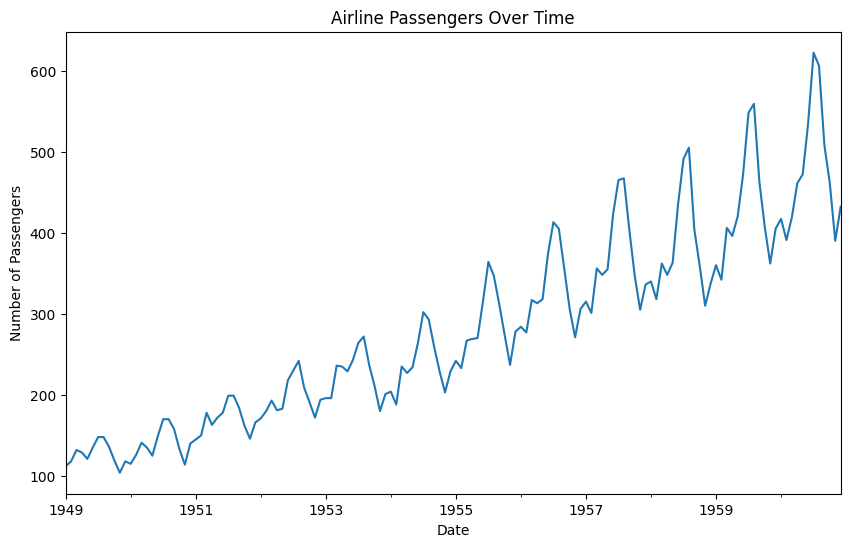

In [ ]:
import matplotlib.pyplot as plt

# Plotting the time series
data['#Passengers'].plot(figsize=(10, 6))
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


In [ ]:
# Trend:

# A trend refers to a long-term increase or decrease in the data.
#In the case of airline passengers, you might notice that the number of passengers generally increases over time.
#If you see a steady upward or downward slope, that‚Äôs a trend.

# Seasonality:

# Seasonality is a repeating pattern or cycle in the data, often driven by external factors such as weather, holidays, or business cycles.
#For example, airline passengers may increase during summer months and holiday seasons.

# In the plot, seasonality would appear as regular, repeating upward and downward fluctuations in the data at consistent intervals
 #(e.g., every year).

# Anomalies:

# Anomalies are sudden and unusual spikes or drops in the data that don‚Äôt follow the regular trend or seasonal patterns.
#These might be caused by outliers, data errors, or unexpected events (e.g., a sharp drop in passengers due to
#an economic crisis or a natural disaster).

# In the plot, anomalies would show up as sudden peaks or valleys that don‚Äôt fit the overall trend or seasonality.

In [ ]:
# Ensure the 'Month' column is in datetime format
data.index = pd.to_datetime(data.index)
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

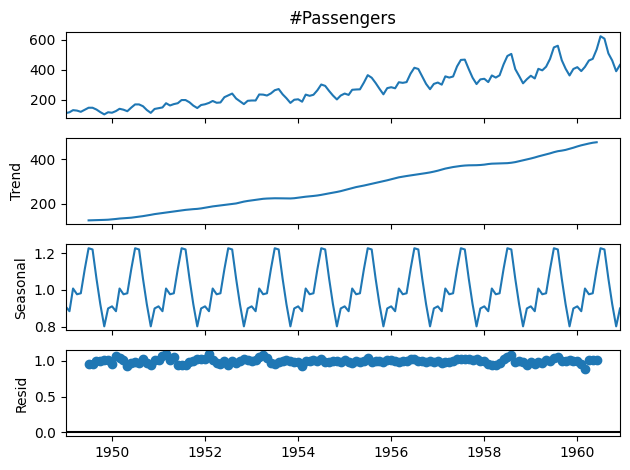

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(data['#Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
result.plot()
plt.show()


When you decompose a time series, you're essentially breaking it down into three parts:

Trend: This represents the long-term movement in the data (e.g., if the number of passengers is generally increasing over time).

Seasonality: This captures the repeating patterns or cycles at regular intervals (e.g., if passenger numbers tend to go up every summer or holiday season).

Residuals (Noise): This is what‚Äôs left after removing the trend and seasonality. It includes random fluctuations that are hard to explain (e.g., sudden spikes or drops that don‚Äôt follow any pattern).

Here's what's happening in the code:
seasonal_decompose(data['#Passengers'], model='multiplicative', period=12):

This function decomposes the time series into the three parts: trend, seasonality, and residuals.

The model='multiplicative' means that the components are multiplied to get the original data (this is often used when the seasonal effect grows as the data increases).

period=12 tells the function that the data has a yearly seasonal pattern (since there are 12 months in a year).

result.plot():

This plots the three decomposed components on separate graphs:

Trend: A line showing the overall direction of the data.

Seasonality: A pattern showing how the data fluctuates on a regular basis.

Residuals: The "noise" or random fluctuations that don‚Äôt fit the trend or seasonality.

What you‚Äôll see in the plot:
The Trend graph will show if there‚Äôs a general upward or downward movement in passenger numbers.

The Seasonality graph will show any repeating cycles (like higher passenger numbers in certain months every year).

The Residuals graph will show random noise‚Äîhopefully, it should look like random fluctuations around zero if the decomposition was successful.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test
result = adfuller(data['#Passengers'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


If the p-value is less than 0.05, the series is likely stationary.

If the p-value is greater than 0.05, the series is likely non-stationary, and you‚Äôll need to difference the data to make it stationary.

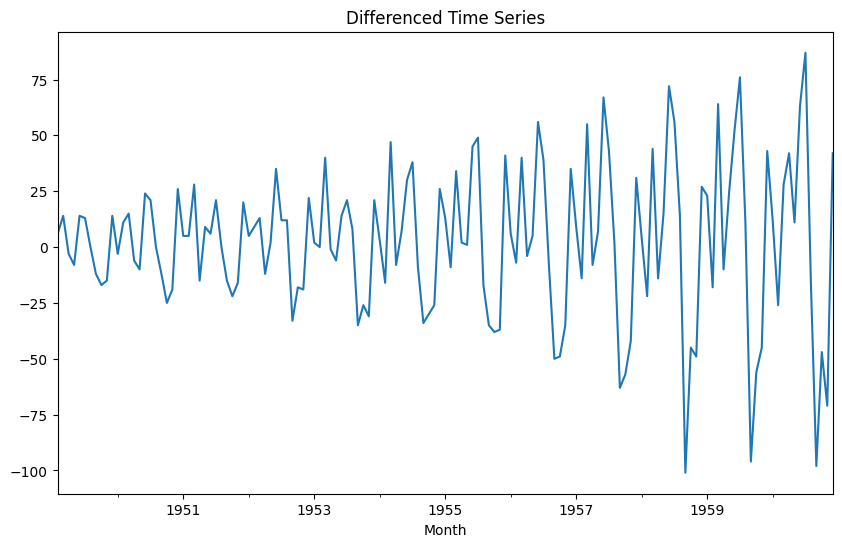

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [ ]:
# First difference
data_diff = data['#Passengers'].diff().dropna()

# Plot the differenced series
data_diff.plot(figsize=(10, 6))
plt.title('Differenced Time Series')
plt.show()

# Re-run the ADF test to check if it's stationary
result = adfuller(data_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


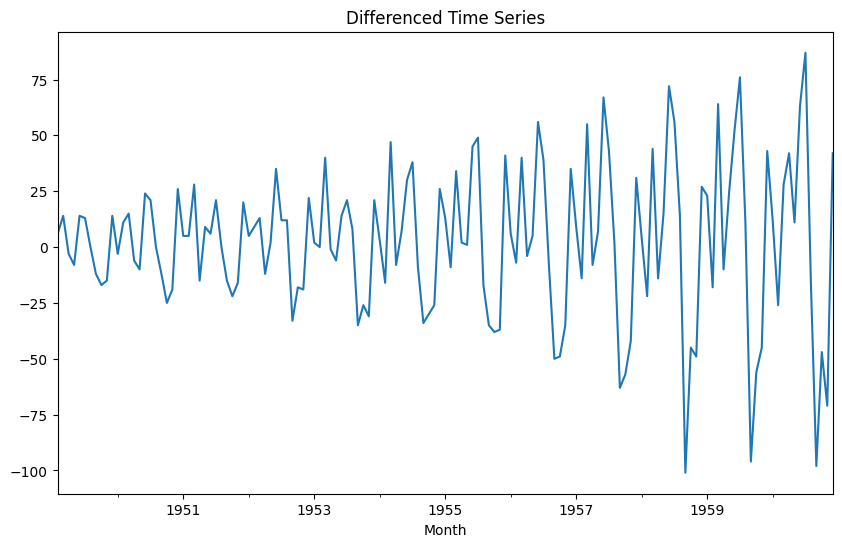

In [ ]:
# Birinci f…ôrq (First difference) t…ôtbiq edirik
data_diff = data['#Passengers'].diff().dropna()

# Yeni f…ôrql…ôndirilmi≈ü seriyanƒ± qrafikl…ô g√∂st…ôririk
data_diff.plot(figsize=(10, 6))
plt.title('Differenced Time Series')
plt.show()


In [ ]:
# ADF testi t…ôtbiq edirik
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


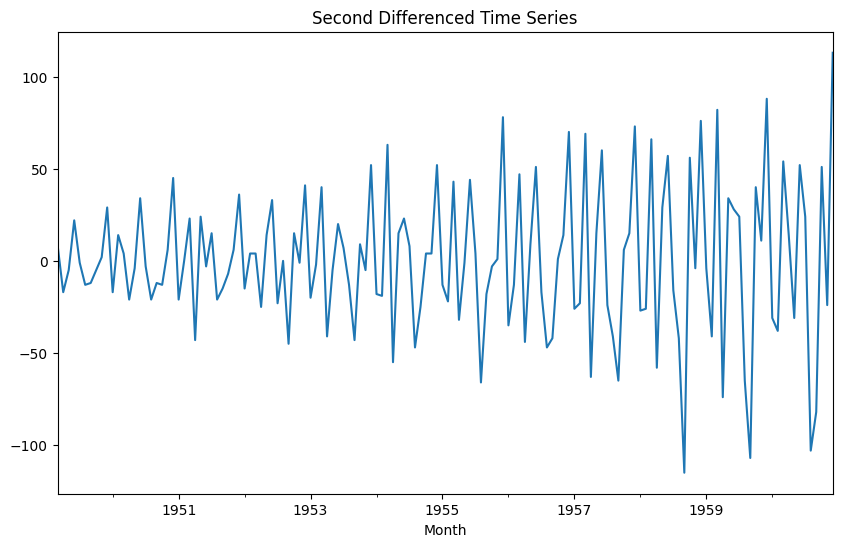

In [ ]:
# ƒ∞kinci f…ôrq (Second difference) t…ôtbiq edirik
data_diff2 = data_diff.diff().dropna()

# Yeni f…ôrql…ôndirilmi≈ü seriyanƒ± qrafikl…ô g√∂st…ôririk
data_diff2.plot(figsize=(10, 6))
plt.title('Second Differenced Time Series')
plt.show()


In [ ]:
# ƒ∞kinci f…ôrq √º√ß√ºn ADF testi t…ôtbiq edirik
result = adfuller(data_diff2)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Orijinal seriyanƒ±n stasionar hala g…ôtirildiyini f…ôrz edirik.
# I = 2 (2 d…ôf…ô differencing etdik).

# ARIMA modeli quraq: ARIMA(p,d,q)
# p = 1 (AR hiss…ôsi) ‚Äî ke√ßmi≈ü d…ôy…ôrl…ôr…ô baxƒ±r.
# d = 2 (differencing sayƒ±) ‚Äî stasionarla≈üdƒ±rmaq √º√ß√ºn.
# q = 1 (MA hiss…ôsi) ‚Äî ke√ßmi≈ü s…ôhvl…ôr…ô baxƒ±r.

model = ARIMA(data['#Passengers'], order=(1, 2, 1))
model_fit = model.fit()

# Model n…ôtic…ôsini √ßap ed…ôk
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -696.464
Date:                Wed, 16 Apr 2025   AIC                           1398.928
Time:                        14:35:00   BIC                           1407.796
Sample:                    01-01-1949   HQIC                          1402.532
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3130      0.100      3.127      0.002       0.117       0.509
ma.L1         -0.9998      5.894     -0.170      0.865     -12.551      10.552
sigma2      1034.0009   6133.239      0.169      0.8

In [ ]:
# G…ôl…ôc…ôk 12 ay √º√ß√ºn proqnoz ver…ôk
forecast = model_fit.forecast(steps=12)
print(forecast)


1961-01-01    446.776968
1961-02-01    453.034339
1961-03-01    456.625454
1961-04-01    459.382150
1961-05-01    461.877710
1961-06-01    464.291546
1961-07-01    466.679806
1961-08-01    469.060062
1961-09-01    471.437813
1961-10-01    473.814780
1961-11-01    476.191502
1961-12-01    478.568147
Freq: MS, Name: predicted_mean, dtype: float64


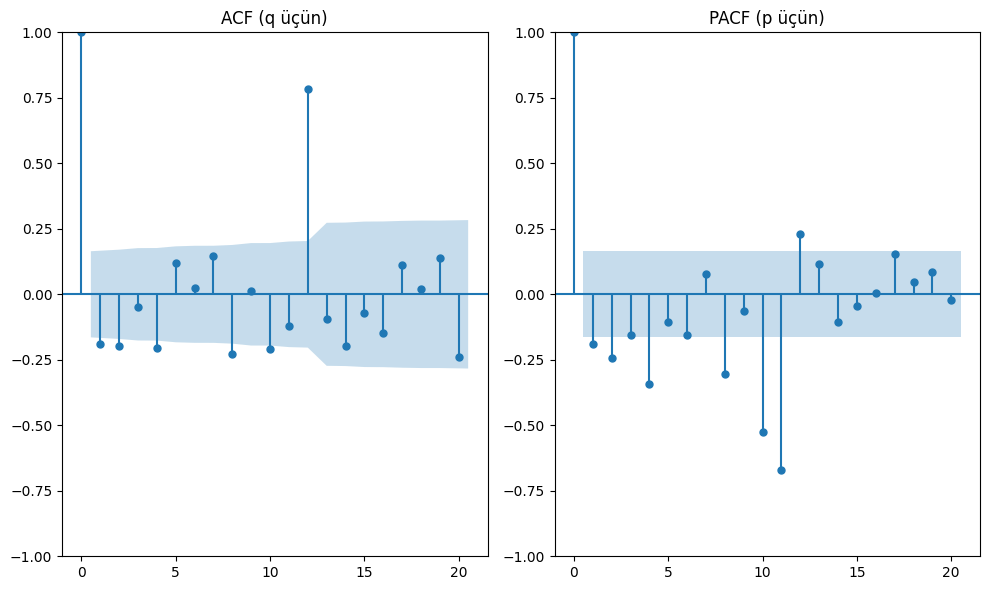

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ∆èg…ôr seriya stasionar hala g…ôtirilmi≈üdirs…ô (2 d…ôf…ô differencing):
diff_data = data['#Passengers'].diff().diff().dropna()

plt.figure(figsize=(10,6))

# Autocorrelation Function (ACF) - q qismind…ôki gecikm…ô (lags) √º√ß√ºn k√∂m…ôk edir
plt.subplot(1, 2, 1)
plot_acf(diff_data, lags=20, ax=plt.gca())
plt.title('ACF (q √º√ß√ºn)')

# Partial Autocorrelation Function (PACF) - p qismind…ôki gecikm…ô √º√ß√ºn k√∂m…ôk edir
plt.subplot(1, 2, 2)
plot_pacf(diff_data, lags=20, ax=plt.gca(), method='ywm')
plt.title('PACF (p √º√ß√ºn)')

plt.tight_layout()
plt.show()


In [ ]:
# 80% train, 20% test b√∂lm…ôk
train_size = int(len(data) * 0.8)

train = data.iloc[:train_size]
test = data.iloc[train_size:]


In [ ]:
# Modeli train set-d…ô qur
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['#Passengers'], order=(1, 2, 1))
model_fit = model.fit()

# Test set √º√ß√ºn proqnoz
forecast = model_fit.forecast(steps=len(test))

# MSE hesablamaq
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['#Passengers'], forecast)

print(f"Test MSE: {mse}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test MSE: 20550.84661276702


Test MSE: 20550.84661276702


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


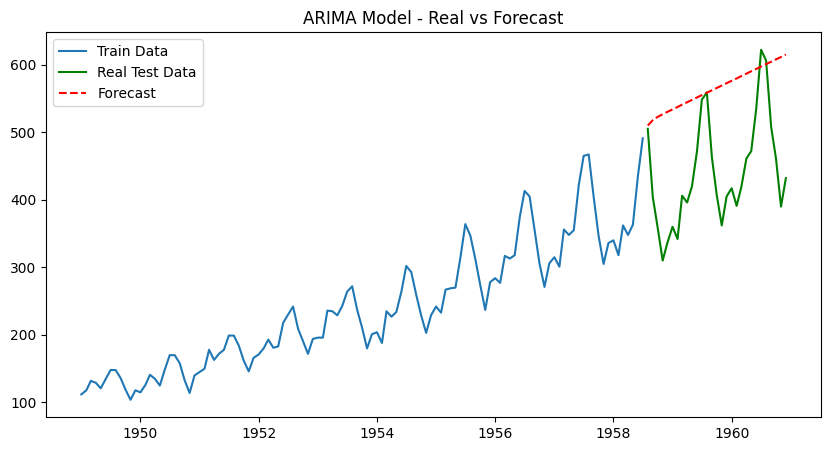

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dataseti y√ºkl…ôy…ôk (…ôg…ôr artƒ±q y√ºkl…ômis…ôns…ô, bu hiss…ô ke√ß…ôrlidir)
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# 80% train, 20% test b√∂lm…ôk
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Modelin qurulmasƒ± (misal √º√ß√ºn: ARIMA(1,2,1))
model = ARIMA(train['#Passengers'], order=(1,2,1))
model_fit = model.fit()

# Test √º√ß√ºn proqnoz (test setin uzunluƒüu q…ôd…ôr)
forecast = model_fit.forecast(steps=len(test))

# MSE hesablayƒ±rƒ±q
mse = mean_squared_error(test['#Passengers'], forecast)
print(f"Test MSE: {mse}")

# Real v…ô Proqnoz qrafiki
plt.figure(figsize=(10,5))
plt.plot(train.index, train['#Passengers'], label='Train Data')
plt.plot(test.index, test['#Passengers'], label='Real Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.legend()
plt.title('ARIMA Model - Real vs Forecast')
plt.show()


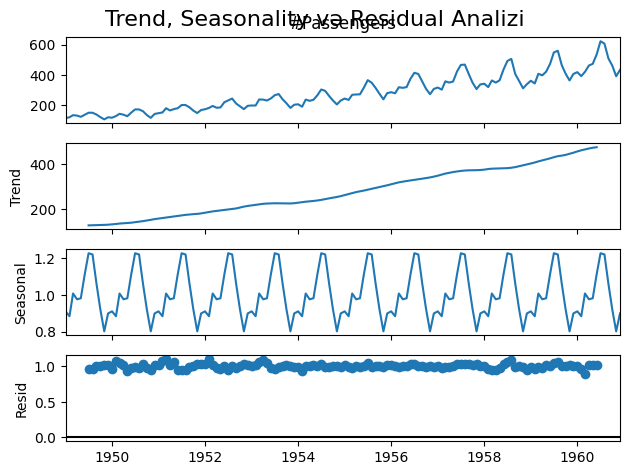

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Time Series decomposition (multiplicative model)
result = seasonal_decompose(data['#Passengers'], model='multiplicative', period=12)

# Plot trend, seasonality v…ô residuals
result.plot()
plt.suptitle('Trend, Seasonality v…ô Residual Analizi', fontsize=16)
plt.show()


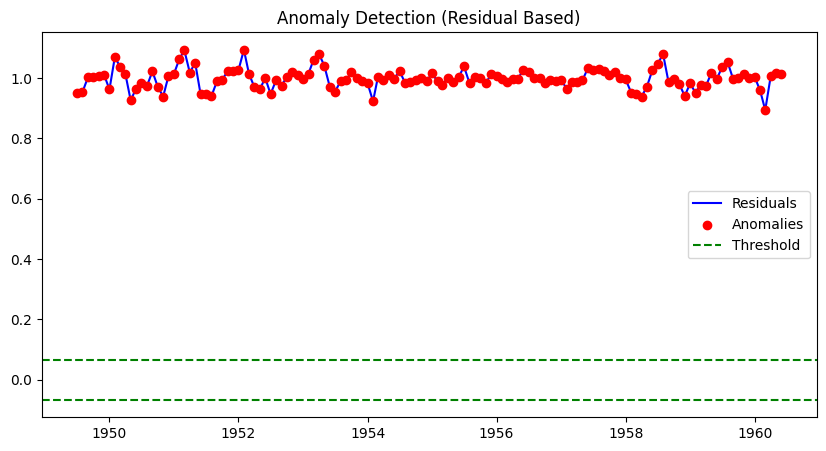

In [ ]:
import numpy as np

residual = result.resid.dropna()

threshold = 2 * np.std(residual)  # sad…ô threshold
anomalies = residual[np.abs(residual) > threshold]

plt.figure(figsize=(10,5))
plt.plot(residual.index, residual, label='Residuals', color='blue')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies', zorder=3)
plt.axhline(threshold, color='green', linestyle='--', label='Threshold')
plt.axhline(-threshold, color='green', linestyle='--')
plt.legend()
plt.title('Anomaly Detection (Residual Based)')
plt.show()


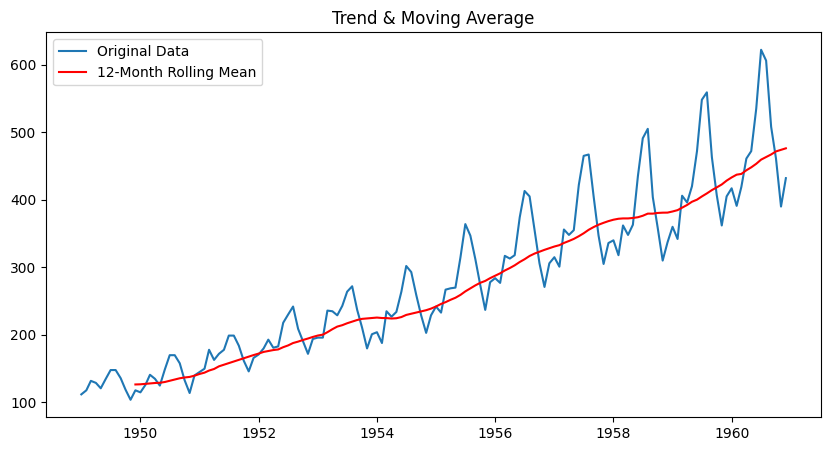

In [ ]:
rolling_mean = data['#Passengers'].rolling(window=12).mean()

plt.figure(figsize=(10,5))
plt.plot(data['#Passengers'], label='Original Data')
plt.plot(rolling_mean, label='12-Month Rolling Mean', color='red')
plt.legend()
plt.title('Trend & Moving Average')
plt.show()


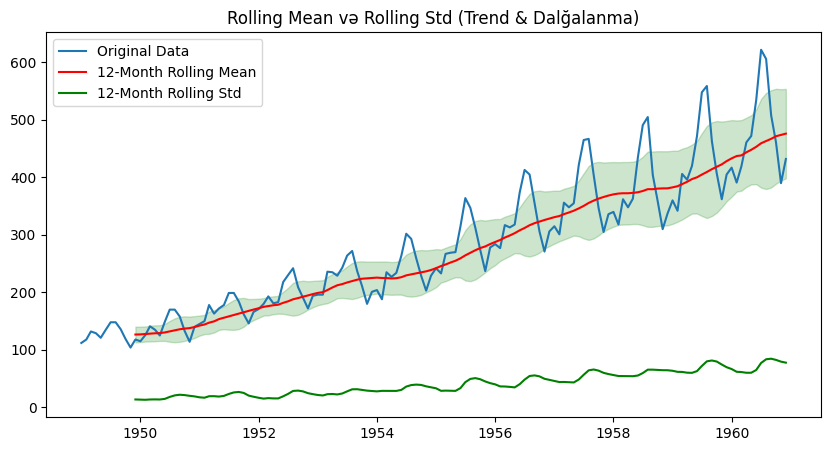

In [ ]:
# Rolling mean (trend)
rolling_mean = data['#Passengers'].rolling(window=12).mean()

# Rolling standard deviation (dalƒüalanmalar)
rolling_std = data['#Passengers'].rolling(window=12).std()

# Plot trend v…ô std
plt.figure(figsize=(10,5))
plt.plot(data['#Passengers'], label='Original Data')  # Real data
plt.plot(rolling_mean, label='12-Month Rolling Mean', color='red')  # Trend
plt.plot(rolling_std, label='12-Month Rolling Std', color='green')  # Std (fluktuasiyalar)
plt.fill_between(data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='green', alpha=0.2)
plt.legend()
plt.title('Rolling Mean v…ô Rolling Std (Trend & Dalƒüalanma)')
plt.show()


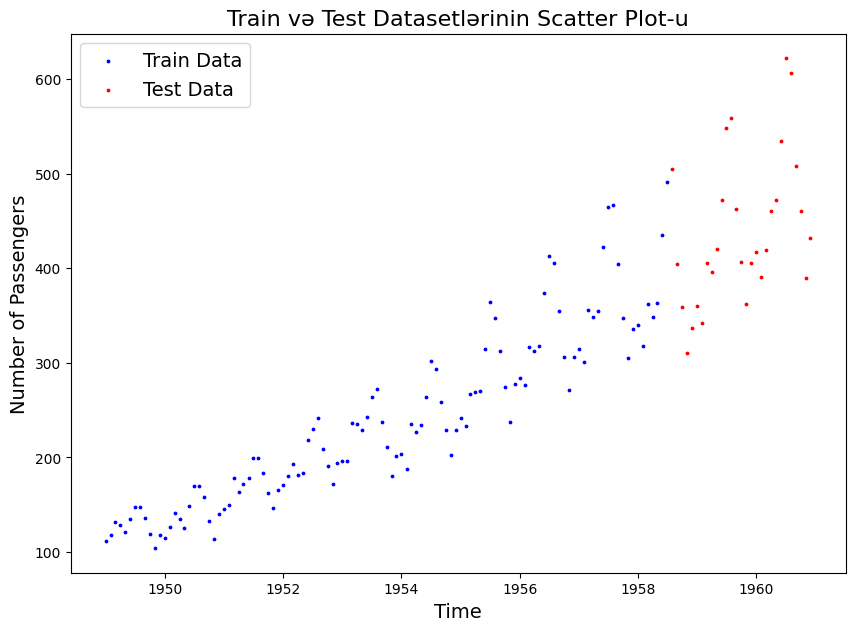

In [ ]:
import matplotlib.pyplot as plt

# Train v…ô test √º√ß√ºn scatter plot yaratmaq
plt.figure(figsize=(10,7))

# Train v…ô Test datasetl…ôri √º√ß√ºn scatter n√∂qt…ôl…ôrini …ôlav…ô edirik
plt.scatter(train.index, train['#Passengers'], s=3, label='Train Data', color='blue')  # Train data
plt.scatter(test.index, test['#Passengers'], s=3, label='Test Data', color='red')   # Test data

# Ox etiketl…ôri
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Legend …ôlav…ô edirik
plt.legend(fontsize=14)

# Qrafik ba≈ülƒ±ƒüƒ±
plt.title('Train v…ô Test Datasetl…ôrinin Scatter Plot-u', fontsize=16)
plt.show()


train.index v…ô test.index: Bu, train v…ô test datasetl…ôrinin tarixl…ôrini g√∂st…ôrir. #Passengers is…ô h…ôr bir zaman √º√ß√ºn yol√ßu sayƒ±nƒ± g√∂st…ôrir.

s=5: Scatter n√∂qt…ôl…ôrinin √∂l√ß√ºs√ºn√º t…ônziml…ôyir.

label: Legend √º√ß√ºn adlar.

color: Train v…ô test datasetl…ôrini f…ôrql…ôndirm…ôk √º√ß√ºn r…ôngl…ôri m√º…ôyy…ôn edir (mavi v…ô qƒ±rmƒ±zƒ±).

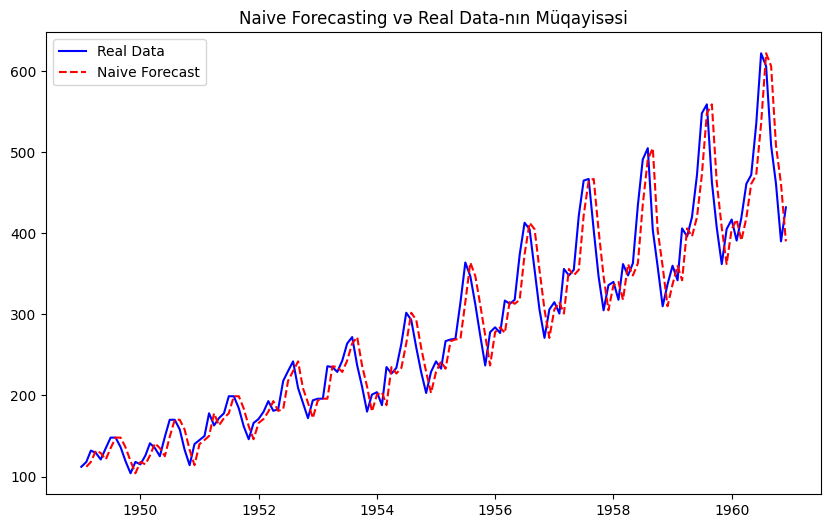

In [ ]:
# Naive Forecasting √º√ß√ºn son d…ôy…ôri t…ôkrarlayƒ±rƒ±q
data['Naive_Forecast'] = data['#Passengers'].shift(1)

# Proqnoz v…ô real veril…ônl…ôri m√ºqayis…ô edirik
plt.figure(figsize=(10,6))
plt.plot(data['#Passengers'], label='Real Data', color='blue')
plt.plot(data['Naive_Forecast'], label='Naive Forecast', color='red', linestyle='--')
plt.legend()
plt.title('Naive Forecasting v…ô Real Data-nƒ±n M√ºqayis…ôsi')
plt.show()


Naive Forecasting (Sad…ô Proqnozla≈üdƒ±rma) metodunun n…ô olduƒüunu ba≈üa d√º≈üm…ôk, zaman seriyalƒ± veril…ônl…ôr…ô …ôsaslanan proqnozlarƒ±n t…ôm…ôl prinsipl…ôrini anlamaya k√∂m…ôk ed…ôc…ôk.

üî• Naive Forecasting n…ôdir?
Naive Forecasting, …ôn sad…ô v…ô …ôsas proqnozla≈üdƒ±rma metodudur. Bu metodda n√∂vb…ôti d…ôy…ôri proqnozla≈üdƒ±rmaq √º√ß√ºn ke√ßmi≈üd…ôki son d…ôy…ôri istifad…ô edirik.

üéØ Sad…ô prinsipl…ô nec…ô i≈ül…ôyir?
N√∂vb…ôti d…ôy…ôr ke√ßmi≈üd…ôki son real d…ôy…ôr il…ô eyni olur.

Y…ôni, …ôg…ôr bu g√ºn√ºn v…ô ya …ôvv…ôlki ayƒ±n qiym…ôtini bilirs…ôns…ô, g…ôl…ôn g√ºn√ºn qiym…ôtini olduƒüu kimi t…ôkrarlayƒ±rsan.

üìä Formula:
ùëå
^
ùë°
+
1
=
ùëå
ùë°
Y
^
  
t+1
‚Äã
 =Y
t
‚Äã


Y_t: Cari d√∂vr√ºn (m…ôs…ôl…ôn, bu ayƒ±n) d…ôy…ôri.

ùëå
^
ùë°
+
1
Y
^
  
t+1
‚Äã
 : G…ôl…ôc…ôk d√∂vr√ºn (m…ôs…ôl…ôn, g…ôl…ôn ayƒ±n) proqnozu.

üß† Misal:
T…ôs…ôvv√ºr et, 2025-ci ilin yanvar ayƒ±nda 1500 n…ôf…ôr s…ôrni≈üin olub (bu bizim Y_t-mizdir). Naive Forecasting metoduna …ôsas…ôn, fevral ayƒ± √º√ß√ºn proqnoz:
ùëå
^
ùë°
+
1
=
ùëå
ùë°
=
1500
Y
^
  
t+1
‚Äã
 =Y
t
‚Äã
 =1500 Bel…ôlikl…ô, fevral ayƒ±nda da 1500 s…ôrni≈üin olacaƒüƒ± t…ôxmin edilir.

üî• Naive Forecasting-in ∆èsas X√ºsusiyy…ôtl…ôri:
Sad…ôlik: Bu metod √ßox sad…ôdir v…ô he√ß bir m√ºr…ôkk…ôb hesablama t…ôl…ôb etmir.

Az performans: Bu metod daha m√ºr…ôkk…ôb modell…ôrd…ôn √ßox z…ôifdir, √ß√ºnki m√∂vcud m…ôlumatlara …ôsaslanaraq sad…ôc…ô ke√ßmi≈üd…ôki d…ôy…ôri t…ôkrarlayƒ±r.

B…ôz…ôn effektiv: B…ôzi sad…ô veril…ônl…ôrd…ô, m…ôs…ôl…ôn, qiym…ôtl…ôrd…ô b√∂y√ºk d…ôyi≈üiklikl…ôr olmursa, naive proqnoz √ßox da pis n…ôtic…ô verm…ôy…ô bil…ôr.

üß† Misal 1:
Bir ≈üirk…ôt h…ôr ay m…ôhsul satƒ±≈üƒ± edir. Son 3 ayƒ±n satƒ±≈ülarƒ±:

Yanvar: 2000

Fevral: 2200

Mart: 2100

Bu metodla april ayƒ± √º√ß√ºn proqnoz:
ùëå
^
ùë°
+
1
=
ùëå
ùë°
=
2100
Y
^
  
t+1
‚Äã
 =Y
t
‚Äã
 =2100

Y…ôni, april ayƒ± √º√ß√ºn satƒ±≈ü proqnozu 2100 olacaq.

üìâ Naive Forecasting-in Limitl…ôri:
Trend yoxdur: ∆èg…ôr veril…ônl…ôrd…ô artƒ±m v…ô ya azalma varsa, Naive Forecast bu d…ôyi≈üiklikl…ôri n…ôz…ôr…ô almaz.

Seasonality (m√∂vs√ºmi d…ôyi≈üiklikl…ôr) yoxdur: Naive Forecast, m√∂vs√ºm d…ôyi≈üiklikl…ôrini v…ô ya d√∂vr√º tendensiyalarƒ± n…ôz…ôr…ô almaz.

----1. Moving Average (H…ôr…ôk…ôtli Orta)
H…ôr…ôk…ôtli Orta proqnozla≈üdƒ±rma, ke√ßmi≈ü d√∂vrl…ôrin ortalamasƒ±nƒ± hesablama prinsipin…ô …ôsaslanƒ±r. Bu metod, x√ºsusil…ô sezonallƒ±q v…ô anomaliyalar olan zaman seriyalarƒ± √º√ß√ºn faydalƒ±dƒ±r.

Sad…ô H…ôr…ôk…ôtli Orta (SMA) v…ô Aƒüƒ±rlƒ±qlƒ± H…ôr…ôk…ôtli Orta (WMA) metodlarƒ± var.

Misal: ∆èg…ôr son 3 ayƒ±n ortalamasƒ±nƒ± istifad…ô ed…ôr…ôk g…ôl…ôn ayƒ± proqnozla≈üdƒ±rƒ±rsansa, bu H…ôr…ôk…ôtli Orta metodudur.

----2. Exponential Smoothing (Eksponensial Yumu≈üatma)
Bu metodda, …ôvv…ôlki d√∂vr√ºn d…ôy…ôri daha √ßox aƒüƒ±rlƒ±qla hesablanƒ±r, y…ôni ke√ßmi≈ü m…ôlumatlara daha b√∂y√ºk aƒüƒ±rlƒ±q verilir.

Simple Exponential Smoothing (SES), Holt‚Äôs Linear Trend Model, Holt-Winters Seasonal Method kimi m√ºxt…ôlif n√∂vl…ôri var.

Holt-Winters (Multiplicative v…ô Additive): M√∂vs√ºmi d…ôyi≈üiklikl…ôri n…ôz…ôr…ô alaraq proqnozla≈üdƒ±rma ed…ôr.

Misal: ∆èg…ôr veril…ônl…ôrd…ô sezonallƒ±q v…ô trend varsa, Holt-Winters yax≈üƒ± i≈ül…ôyir.


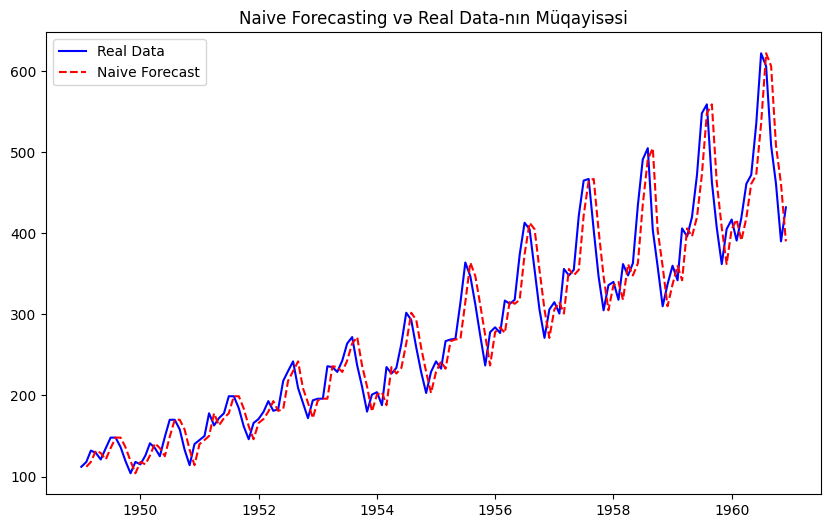

Naive Forecasting MSE: 1136.3916083916083


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Zaman seriyasƒ±nƒ± oxumaq
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=True, index_col='Month')

# Naive Forecasting t…ôtbiq etm…ôk (ke√ßmi≈ü d…ôy…ôri n√∂vb…ôti d√∂vr √º√ß√ºn proqnoz olaraq alƒ±rƒ±q)
data['Naive_Forecast'] = data['#Passengers'].shift(1)

# Proqnozla≈üdƒ±rƒ±lan v…ô real veril…ônl…ôri m√ºqayis…ô etm…ôk
plt.figure(figsize=(10,6))
plt.plot(data['#Passengers'], label='Real Data', color='blue')
plt.plot(data['Naive_Forecast'], label='Naive Forecast', color='red', linestyle='--')
plt.legend()
plt.title('Naive Forecasting v…ô Real Data-nƒ±n M√ºqayis…ôsi')
plt.show()

# M…ôlumatlarƒ± m√ºqayis…ô etm…ôk √º√ß√ºn MSE (Mean Squared Error) hesablaya bil…ôrik
from sklearn.metrics import mean_squared_error

# MSE hesablamaq (Naive Forecasting-in s…ôhvi)
mse = mean_squared_error(data['#Passengers'][1:], data['Naive_Forecast'][1:])
print(f"Naive Forecasting MSE: {mse}")


In [ ]:
import tensorflow as tf
import numpy as np

# Funksiya yaradƒ±lmasƒ±
def evaluate_preds(y_true, y_pred):
    # Yuxarƒ±da veril…ônl…ôri `float32` tipin…ô √ßeviririk
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Mean Absolute Error (MAE)
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Mean Squared Error (MSE)
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Root Mean Squared Error (RMSE)
    rmse = tf.sqrt(mse)

    # Mean Absolute Percentage Error (MAPE)
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

    # Naive Forecasting √º√ß√ºn MAE
    naive_pred = y_true[:-1]  # Naive Forecasting: Sonraki d√∂vr ke√ßmi≈ü d√∂vr√ºn eynisi olacaq
    mae_naive = tf.reduce_mean(tf.abs(y_true[1:] - naive_pred))  # 1-ci indeksd…ôn ba≈ülayƒ±rƒ±q

    # MASE hesablanmasƒ±
    mase = mae / mae_naive

    # N…ôtic…ôl…ôri bir dictionary ≈ü…ôklind…ô qaytarƒ±rƒ±q
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': mape.numpy(),
        'mase': mase.numpy()
    }

# M…ôs…ôl…ôn, sizin test v…ô ya t…ôlim m…ôlumatlarƒ±nƒ±zƒ±n proqnozlarƒ± il…ô m√ºqayis…ô etm…ôk
# Y_true - …ôsl d…ôy…ôrl…ôr, Y_pred - proqnozla≈üdƒ±rƒ±lmƒ±≈ü d…ôy…ôrl…ôr

y_true = np.array([100, 120, 130, 150, 160])  # H…ôqiqi d…ôy…ôrl…ôr
y_pred = np.array([110, 115, 140, 145, 158])  # Proqnozla≈üdƒ±rƒ±lmƒ±≈ü d…ôy…ôrl…ôr

# Funksiyanƒ± √ßaƒüƒ±rmaq
results = evaluate_preds(y_true, y_pred)

# N…ôtic…ôl…ôri √ßap edirik
print("Modelin qiym…ôtl…ôndirm…ô n…ôtic…ôl…ôri:")
for metric, value in results.items():
    print(f"{metric}: {value}")


Modelin qiym…ôtl…ôndirm…ô n…ôtic…ôl…ôri:
mae: 6.400000095367432
mse: 50.79999923706055
rmse: 7.127411842346191
mape: 5.288461685180664
mase: 0.4266666769981384


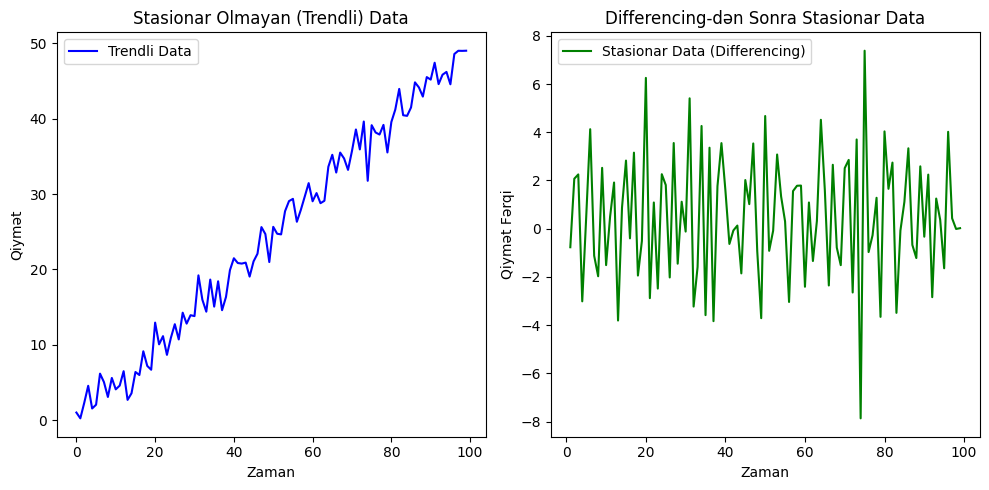

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# S√ºni trendli zaman seriyasƒ± yaradƒ±rƒ±q
np.random.seed(42)
time = np.arange(100)
trend = time * 0.5   # h…ôr addƒ±mda artan trend
noise = np.random.normal(0, 2, 100)  # random s…ôs
data = trend + noise

# Stasionar etm…ôk √º√ß√ºn differencing
diff_data = pd.Series(data).diff().dropna()

# Vizual olaraq baxaq
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(time, data, label='Trendli Data', color='blue')
plt.title("Stasionar Olmayan (Trendli) Data")
plt.xlabel("Zaman")
plt.ylabel("Qiym…ôt")
plt.legend()

plt.subplot(1,2,2)
plt.plot(diff_data, label='Stasionar Data (Differencing)', color='green')
plt.title("Differencing-d…ôn Sonra Stasionar Data")
plt.xlabel("Zaman")
plt.ylabel("Qiym…ôt F…ôrqi")
plt.legend()

plt.tight_layout()
plt.show()


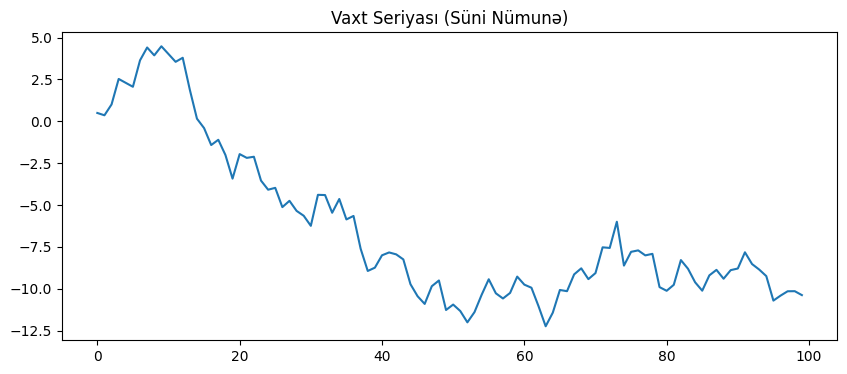

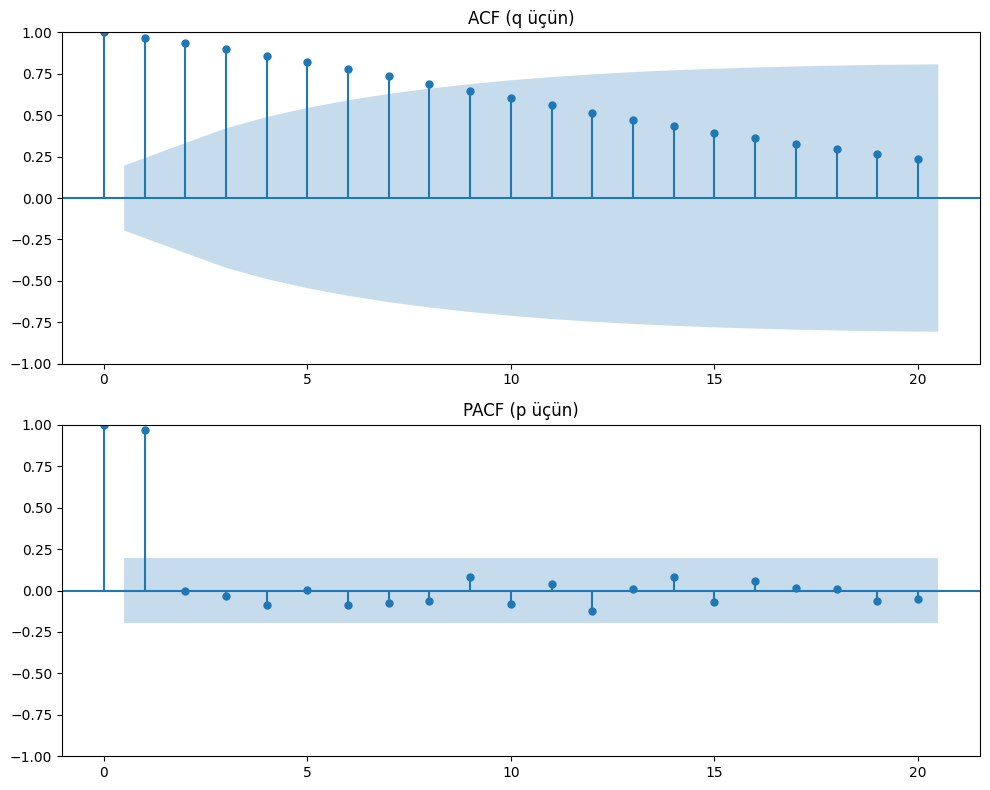

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# S√ºni vaxt seriyasƒ± yaradƒ±rƒ±q
np.random.seed(42)
data = pd.Series(np.random.randn(100).cumsum())  # Random y√ºr√º≈ü (trendli vaxt seriyasƒ±)

# Qrafik…ô baxƒ±rƒ±q
plt.figure(figsize=(10,4))
plt.plot(data)
plt.title("Vaxt Seriyasƒ± (S√ºni N√ºmun…ô)")
plt.show()

# ACF v…ô PACF qrafikl…ôri
fig, ax = plt.subplots(2, 1, figsize=(10,8))

data_diff = data.diff().dropna()

# ACF qrafiki (q t…ôyini √º√ß√ºn)
plot_acf(data, lags=20, ax=ax[0])
ax[0].set_title("ACF (q √º√ß√ºn)")

# PACF qrafiki (p t…ôyini √º√ß√ºn)
plot_pacf(data, lags=20, ax=ax[1], method='ywm')
ax[1].set_title("PACF (p √º√ß√ºn)")

plt.tight_layout()
plt.show()


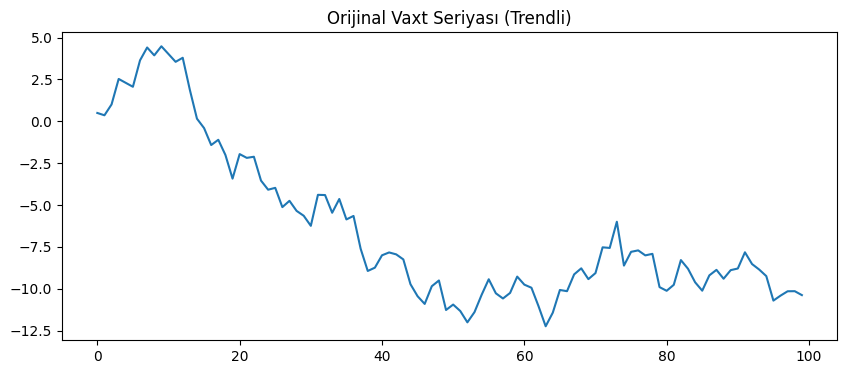

ADF Test Statistic: -1.3583317659818992
p-value: 0.6020814791099098


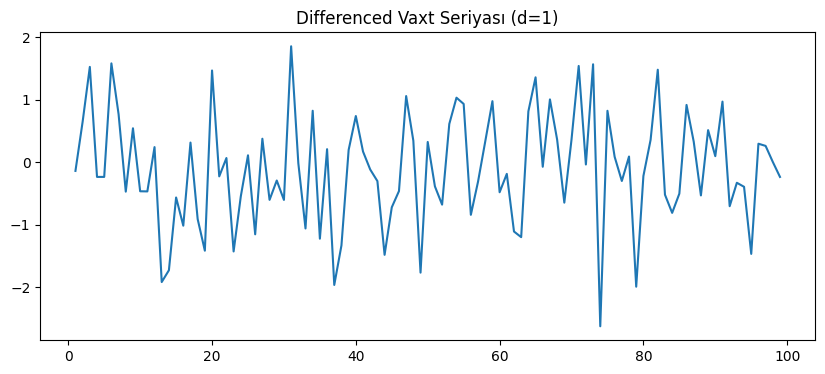

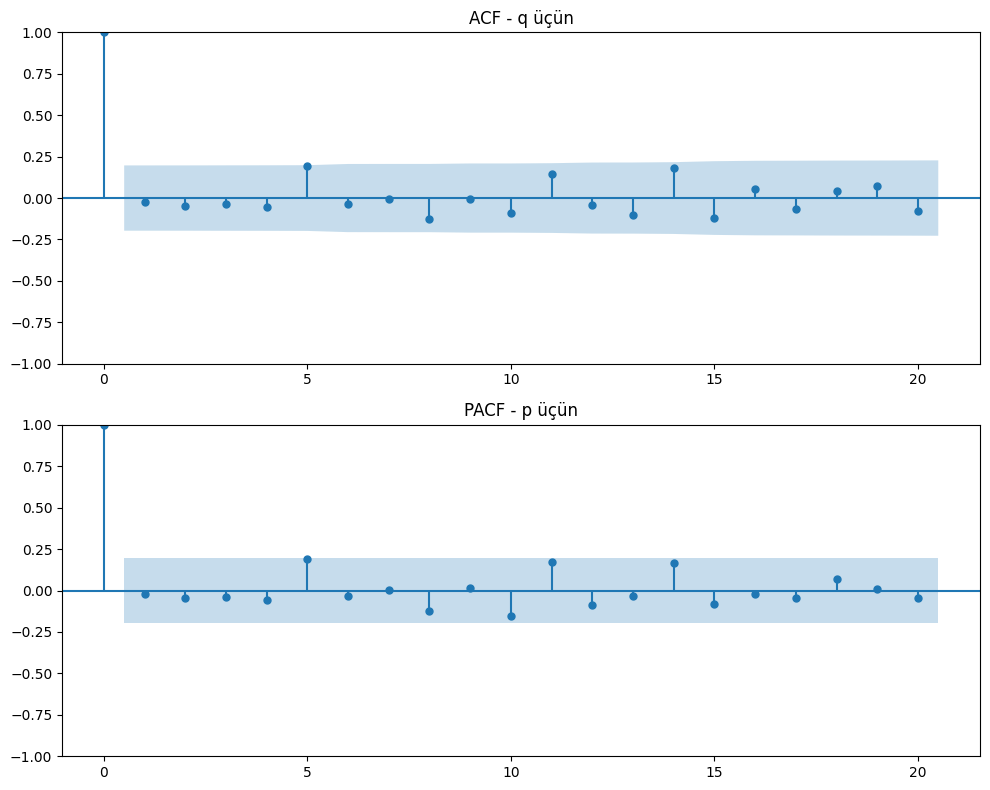

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Random cumsum vaxt seriyasƒ± (trendli data)
np.random.seed(42)
data = pd.Series(np.random.randn(100).cumsum())

# Orijinal datanƒ±n qrafiki
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("Orijinal Vaxt Seriyasƒ± (Trendli)")
plt.show()

# ===========================
# Stasionarlƒ±q testi (ADF test)
adf_result = adfuller(data)
print(f"ADF Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# ∆èg…ôr p-value > 0.05 is…ô => Stasionar deyil, differencing lazƒ±mdƒ±r
# ===========================

# Differencing (d=1)
data_diff = data.diff().dropna()

# Differenced datanƒ±n qrafiki
plt.figure(figsize=(10, 4))
plt.plot(data_diff)
plt.title("Differenced Vaxt Seriyasƒ± (d=1)")
plt.show()

# ===========================
# ACF v…ô PACF qrafikl…ôri

fig, ax = plt.subplots(2, 1, figsize=(10,8))

# ACF: q tapmaq √º√ß√ºn
plot_acf(data_diff, lags=20, ax=ax[0])
ax[0].set_title("ACF - q √º√ß√ºn")

# PACF: p tapmaq √º√ß√ºn
plot_pacf(data_diff, lags=20, ax=ax[1], method='ywm')
ax[1].set_title("PACF - p √º√ß√ºn")

plt.tight_layout()
plt.show()


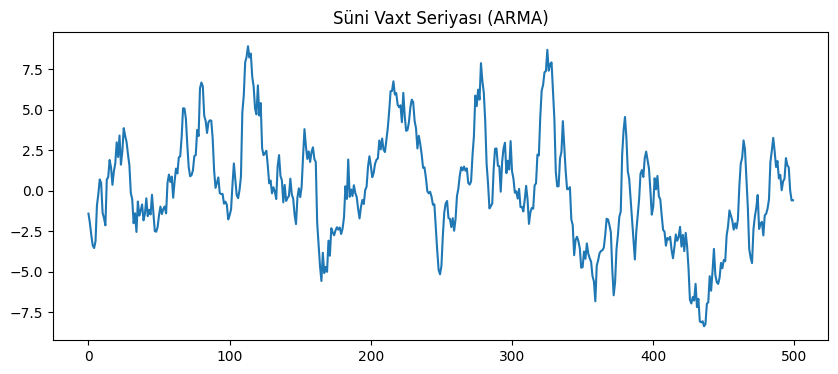

ADF Test Statistic: -4.226832690959474
p-value: 0.0005932766114097052


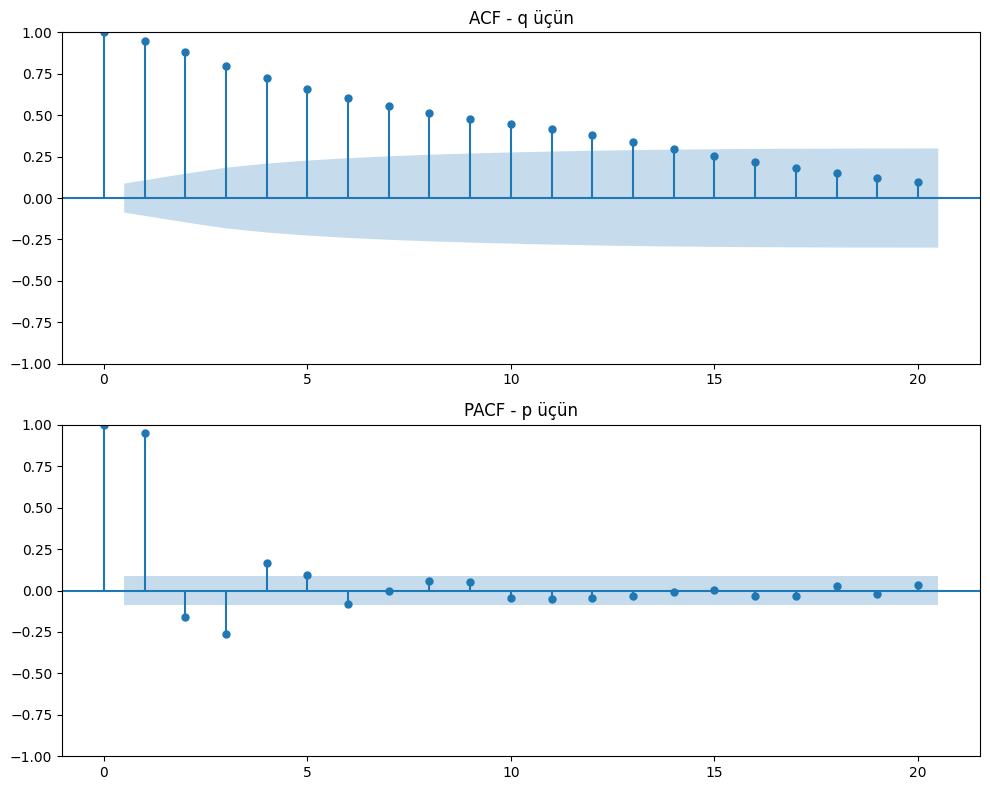

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# S√ºni vaxt seriyasƒ± yaradƒ±rƒ±q: AR(2) + MA(2) model…ô uyƒüun data
from statsmodels.tsa.arima_process import ArmaProcess

# Model: AR(2), MA(2)
ar_params = np.array([1, -0.6, -0.3])  # AR lag1=0.6, lag2=0.3
ma_params = np.array([1, 0.5, 0.4])    # MA lag1=0.5, lag2=0.4

AR_object = ArmaProcess(ar_params, ma_params)
simulated_data = AR_object.generate_sample(nsample=500)

# DataFrame ≈ü…ôklin…ô salaq
data = pd.Series(simulated_data)

# Orijinal data qrafiki
plt.figure(figsize=(10,4))
plt.plot(data)
plt.title("S√ºni Vaxt Seriyasƒ± (ARMA)")
plt.show()

# =====================
# Stasionarlƒ±q testi
result = adfuller(data)
print(f"ADF Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# p-value < 0.05 is…ô data stasionardƒ±r, d = 0
# =====================

# ACF v…ô PACF qrafikl…ôri il…ô p v…ô q tapmaq

fig, ax = plt.subplots(2, 1, figsize=(10,8))

# q √º√ß√ºn ACF
plot_acf(data, lags=20, ax=ax[0])
ax[0].set_title("ACF - q √º√ß√ºn")

# p √º√ß√ºn PACF
plot_pacf(data, lags=20, ax=ax[1], method='ywm')
ax[1].set_title("PACF - p √º√ß√ºn")

plt.tight_layout()
plt.show()


<ipython-input-1-f69b4f548f21>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


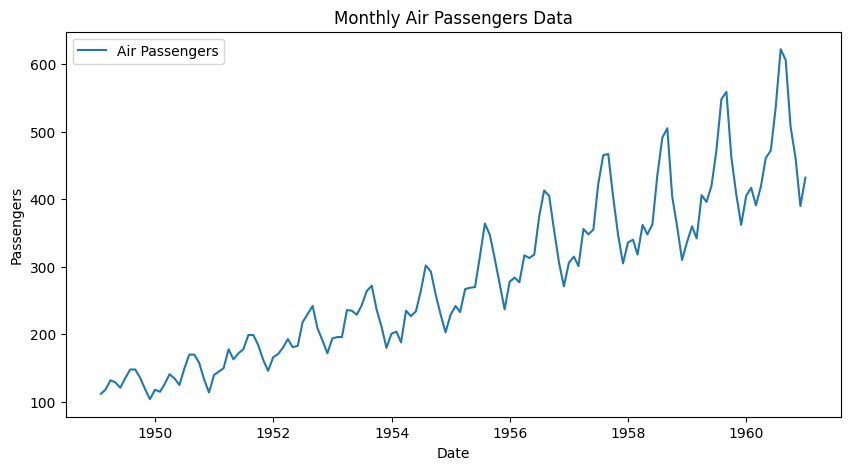

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Log-Likelihood: -694.3412526626241
AIC: 1394.6825053252483
BIC: 1403.5710392160279
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 21 Apr 2025   AIC                           1394.683
Time:                        08:08:49   BIC                           1403.571
Sample:                    01-31-1949   HQIC                          1398.294
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051     

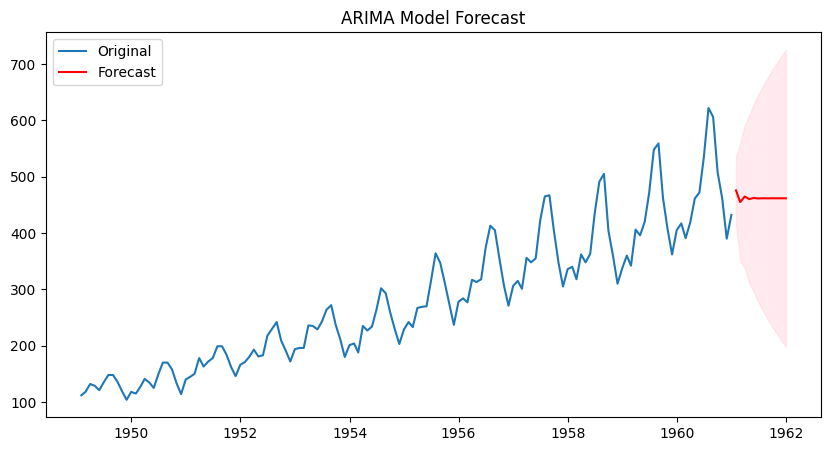

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# üî• 1. Data y√ºkl…ôy…ôk
# M…ôs…ôl…ôn, AirPassengers datasƒ±:
data = sm.datasets.get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# Yalnƒ±z s…ôrni≈üin sayƒ± s√ºtununu se√ß…ôk
ts = data['value']

# üìä 2. Dataya baxƒ±≈ü
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Air Passengers')
plt.title('Monthly Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# ‚öôÔ∏è 3. ARIMA Modeli Qururuq (p,d,q) = (1,1,1)
model = sm.tsa.ARIMA(ts, order=(1,1,1))
result = model.fit()

# üì¢ 4. Model n…ôtic…ôl…ôri
print("=====================================")
print("Log-Likelihood:", result.llf)  # log-likelihood
print("AIC:", result.aic)            # Akaike Information Criterion
print("BIC:", result.bic)            # Bayesian Information Criterion
print("=====================================")

# üí° ∆èlav…ô olaraq: Model x√ºlas…ôsi
print(result.summary())

# üìà 5. Proqnoz (son 12 ay √º√ß√ºn)
forecast = result.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# N…ôtic…ôni qrafikd…ô g√∂st…ôr…ôk:
plt.figure(figsize=(10,5))
plt.plot(ts, label='Original')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()


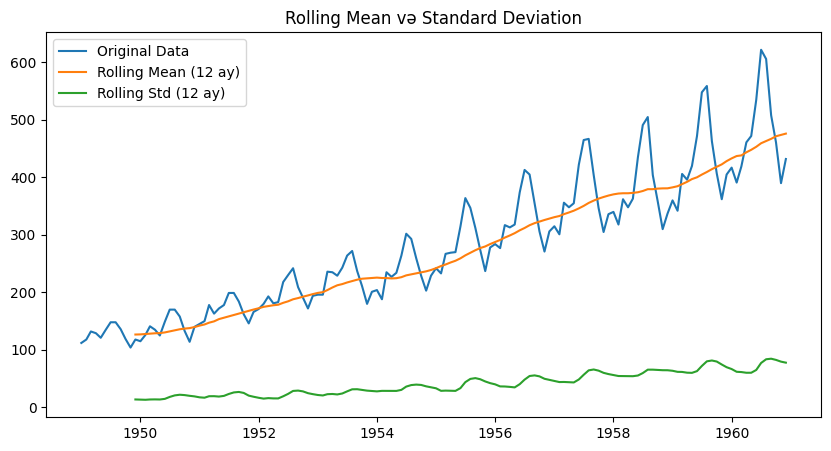

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 21 Apr 2025   AIC                           1394.683
Time:                        09:08:11   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

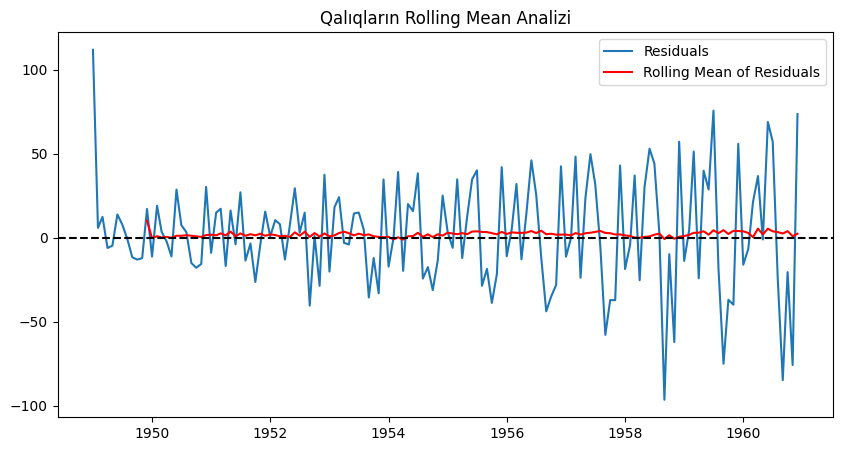

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# üß† Misal √º√ß√ºn "AirPassengers" datasƒ±:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# üéØ 1. Rolling Mean v…ô STD hesablayƒ±rƒ±q
df['Rolling_Mean'] = df['Passengers'].rolling(window=12).mean()
df['Rolling_STD'] = df['Passengers'].rolling(window=12).std()

# üî• Rolling il…ô Vizual analiz:
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(df['Rolling_Mean'], label='Rolling Mean (12 ay)')
plt.plot(df['Rolling_STD'], label='Rolling Std (12 ay)')
plt.legend()
plt.title('Rolling Mean v…ô Standard Deviation')
plt.show()

# üéØ 2. ARIMA Model Qururuq (p,d,q) = (1,1,1)
model = ARIMA(df['Passengers'], order=(1,1,1))
model_fit = model.fit()

# N…ôtic…ôl…ôr
print(model_fit.summary())

# üéØ 3. Qalƒ±qlarƒ± (Residuals) hesablayƒ±rƒ±q
residuals = model_fit.resid

# üéØ 4. Qalƒ±qlarƒ±n Rolling Mean-in…ô baxƒ±rƒ±q
plt.figure(figsize=(10,5))
plt.plot(residuals, label='Residuals')
plt.plot(residuals.rolling(window=12).mean(), label='Rolling Mean of Residuals', color='red')
plt.axhline(0, linestyle='--', color='black')
plt.legend()
plt.title('Qalƒ±qlarƒ±n Rolling Mean Analizi')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Mon, 21 Apr 2025   AIC                           1022.299
Time:                                    09:33:26   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

<ipython-input-3-6eb722968b86>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label='Proqnoz')


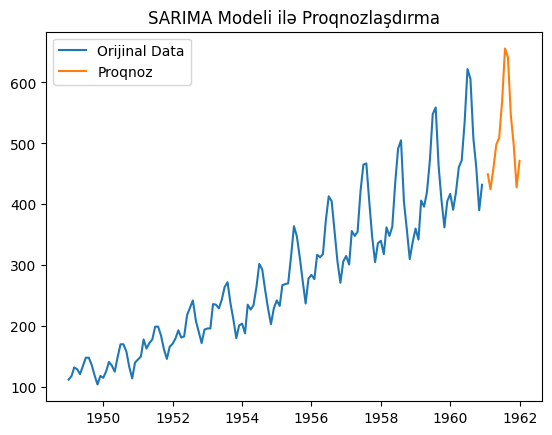

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# M…ôlumatlarƒ± y√ºkl…ôyirik (AirPassengers misalƒ±)
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# SARIMA Modelini qururuq (p,d,q)(P,D,Q,S) parametrl…ôri il…ô
model = SARIMAX(df['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Model n…ôtic…ôl…ôrini √ßap edirik
print(model_fit.summary())

# Proqnozla≈üdƒ±rma
forecast = model_fit.forecast(steps=12)  # N√∂vb…ôti 12 ay √º√ß√ºn proqnoz
plt.plot(df.index, df['Passengers'], label='Orijinal Data')
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label='Proqnoz')
plt.legend()
plt.title('SARIMA Modeli il…ô Proqnozla≈üdƒ±rma')
plt.show()


In [ ]:
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # M…ôlumatƒ± y√ºkl…ôyirik
# data = pd.read_csv('your_timeseries.csv', parse_dates=True, index_col='date')

# # Tezlik (frequency) t…ôyin edirik
# data = data.asfreq('M')  # Aylarla m…ôlumatlarƒ± qeyd edirik
# # V…ô ya
# # data = data.asfreq('D')  # G√ºnd…ôlik m…ôlumatlarƒ± qeyd edirik

# # SARIMA Modelini qururuq
# sarima_model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))  # 12 ay m√∂vs√ºm√º
# # V…ô ya
# # sarima_model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,365))  # 365 g√ºnl√ºk m√∂vs√ºm

# # Modeli uyƒüunla≈üdƒ±rƒ±rƒ±q
# result = sarima_model.fit()

# # N…ôtic…ôl…ôri …ôld…ô edirik
# print(result.summary())


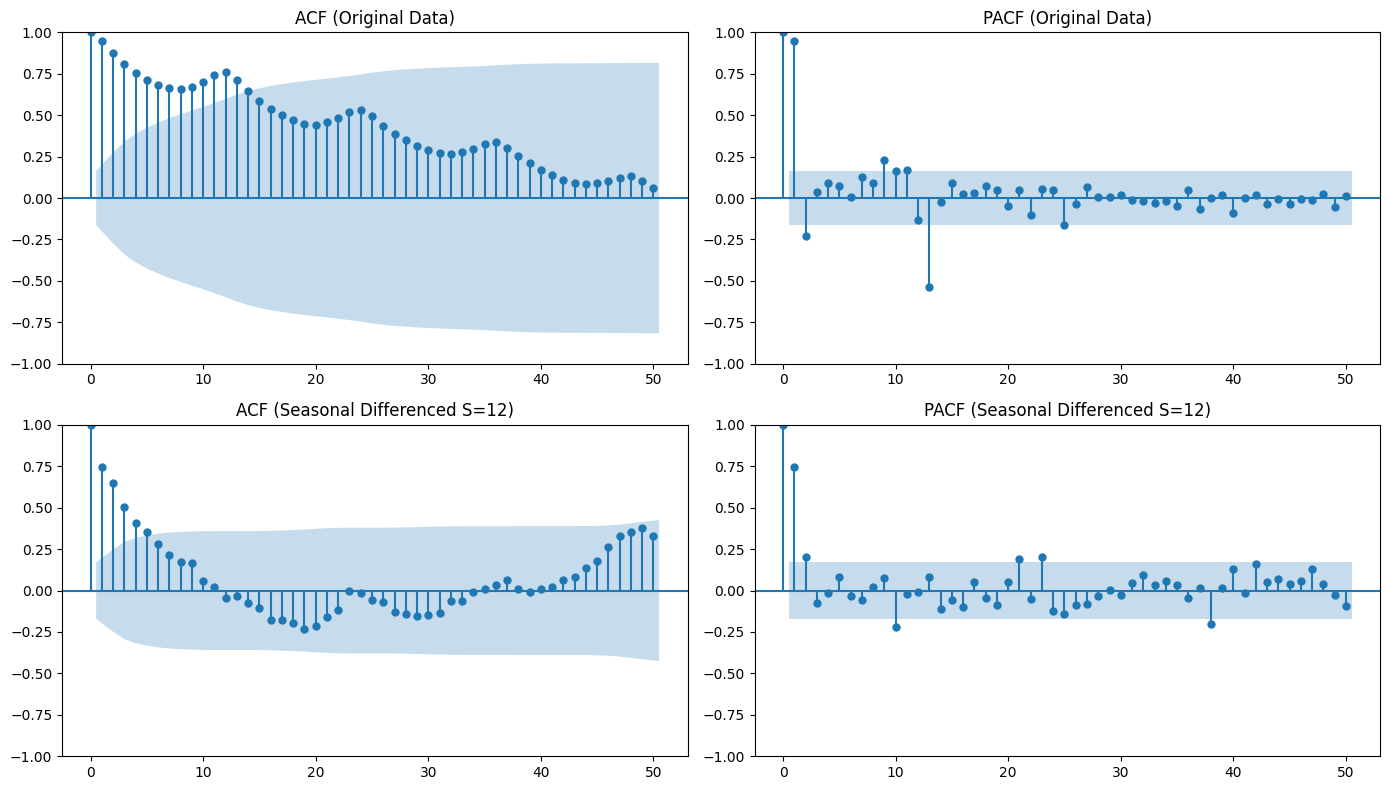

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# üî• Data n√ºmun…ôsi (√∂z datasƒ±nƒ± da burada istifad…ô ed…ô bil…ôrs…ôn)
# M…ôs…ôl…ôn AirPassengers datasƒ±
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# üëâ M√∂vs√ºm uzunluƒüunu qeyd edirik
season_length = 12

# üéØ ACF v…ô PACF vizualla≈üdƒ±rma
fig, axes = plt.subplots(2, 2, figsize=(14,8))

# Qeyri-m√∂vs√ºmi ACF v…ô PACF (orijinal data)
plot_acf(data['Passengers'], lags=50, ax=axes[0,0])
axes[0,0].set_title("ACF (Original Data)")

plot_pacf(data['Passengers'], lags=50, ax=axes[0,1])
axes[0,1].set_title("PACF (Original Data)")

# M√∂vs√ºmi f…ôrql…ônmi≈ü data
seasonal_diff = data['Passengers'].diff(season_length).dropna()

# M√∂vs√ºmi √º√ß√ºn ACF v…ô PACF
plot_acf(seasonal_diff, lags=50, ax=axes[1,0])
axes[1,0].set_title(f"ACF (Seasonal Differenced S={season_length})")

plot_pacf(seasonal_diff, lags=50, ax=axes[1,1])
axes[1,1].set_title(f"PACF (Seasonal Differenced S={season_length})")

plt.tight_layout()
plt.show()


     y     EMA_3
0  100  100.0000
1  102  101.0000
2  105  103.0000
3  103  103.0000
4  108  105.5000
5  110  107.7500
6  115  111.3750
7  117  114.1875


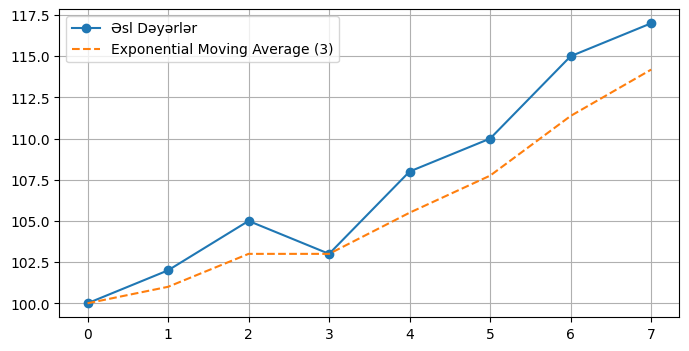

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# S√ºni time series yaratmaq
data = {'y': [100, 102, 105, 103, 108, 110, 115, 117]}
df = pd.DataFrame(data)

# EMA hesablanmasƒ±
df['EMA_3'] = df['y'].ewm(span=3, adjust=False).mean()

# N…ôtic…ô
print(df)

# Qrafikl…ô g√∂st…ôr…ôk
plt.figure(figsize=(8,4))
plt.plot(df['y'], label='∆èsl D…ôy…ôrl…ôr', marker='o')
plt.plot(df['EMA_3'], label='Exponential Moving Average (3)', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


     y         SES
0  100  100.000000
1  102  100.000000
2  105  100.400000
3  103  101.320000
4  108  101.656000
5  110  102.924800
6  115  104.339840
7  117  106.471872


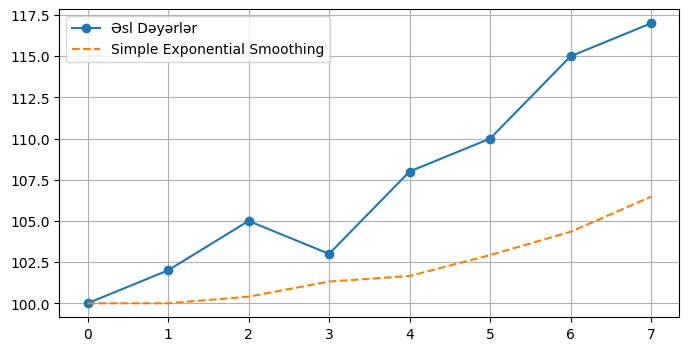

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# M…ôs…ôl…ôn, time series datasƒ±
data = {'y': [100, 102, 105, 103, 108, 110, 115, 117]}
df = pd.DataFrame(data)

# Simple Exponential Smoothing (SES)
model_ses = SimpleExpSmoothing(df['y'])
model_fitted_ses = model_ses.fit(smoothing_level=0.2, optimized=False)  # smoothing_level: alpha

# Proqnozla≈üdƒ±rƒ±lmƒ±≈ü d…ôy…ôrl…ôr
df['SES'] = model_fitted_ses.fittedvalues

# N…ôtic…ô
print(df)

# Qrafikl…ô g√∂st…ôr…ôk
plt.figure(figsize=(8,4))
plt.plot(df['y'], label='∆èsl D…ôy…ôrl…ôr', marker='o')
plt.plot(df['SES'], label='Simple Exponential Smoothing', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Satƒ±≈ü m…ôlumatlarƒ± (zaman seriyasƒ±)
data = {'Sales': [100, 110, 115, 120, 130, 125, 140, 150]}
df = pd.DataFrame(data)

# SES Modelini qururuq
model = SimpleExpSmoothing(df['Sales'])
fitted_model = model.fit(smoothing_level=0.2, optimized=False)  # alpha=0.2

# Model uyƒüunla≈üdƒ±rƒ±lmƒ±≈ü d…ôy…ôrl…ôr (proqnoz)
df['Predicted'] = fitted_model.fittedvalues

# G…ôl…ôc…ôk 3 ay √º√ß√ºn proqnoz:
forecast = fitted_model.forecast(steps=3)

print("G…ôl…ôc…ôk 3 ay √º√ß√ºn proqnoz:")
print(forecast)


G…ôl…ôc…ôk 3 ay √º√ß√ºn proqnoz:
8     125.817728
9     125.817728
10    125.817728
dtype: float64


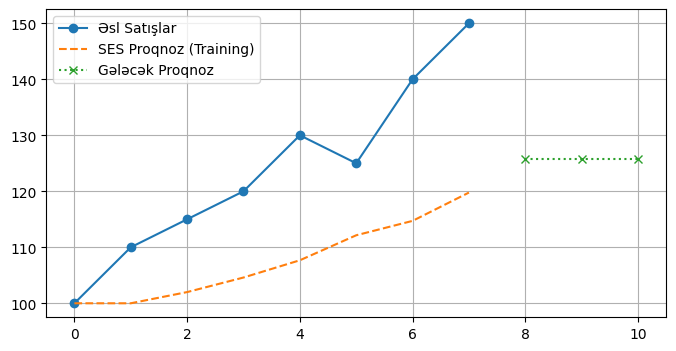

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df['Sales'], label='∆èsl Satƒ±≈ülar', marker='o')
plt.plot(df['Predicted'], label='SES Proqnoz (Training)', linestyle='--')

# G…ôl…ôc…ôk proqnozlar
future_index = range(len(df), len(df) + len(forecast))
plt.plot(future_index, forecast, label='G…ôl…ôc…ôk Proqnoz', marker='x', linestyle='dotted')

plt.legend()
plt.grid(True)
plt.show()


<ipython-input-5-cf394c3775c4>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = pd.DataFrame({'Passengers': data.value.values}, index=pd.date_range(start='1949-01-01', periods=len(data), freq='M'))


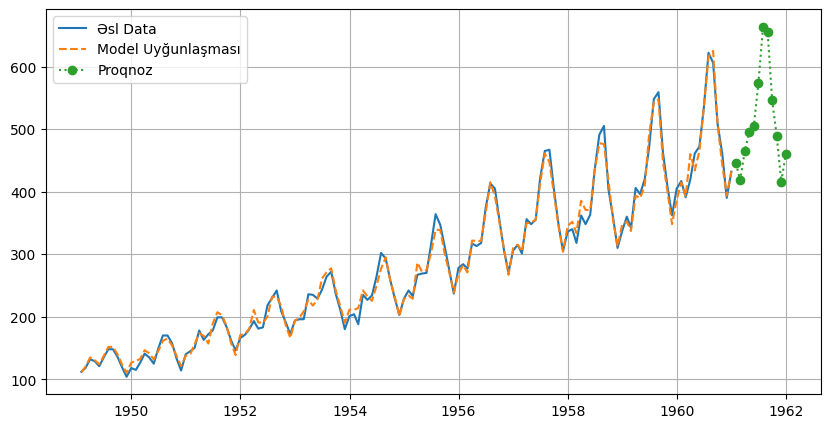

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# AirPassengers datasƒ±nƒ± y√ºkl…ôyirik
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers', 'datasets').data

# Data zaman seriyasƒ± ≈ü…ôklind…ô
df = pd.DataFrame({'Passengers': data.value.values}, index=pd.date_range(start='1949-01-01', periods=len(data), freq='M'))

# Holt-Winters modeli (multiplicative seasonality, trend il…ô)
model = ExponentialSmoothing(df['Passengers'],
                              trend='add',          # trend komponenti
                              seasonal='mul',       # m√∂vs√ºmi komponent
                              seasonal_periods=12)  # 12 ay m√∂vs√ºm d√∂vr√º

fitted_model = model.fit()

# G…ôl…ôc…ôk 12 ay √º√ß√ºn proqnoz
forecast = fitted_model.forecast(steps=12)

# Qrafikl…ô g√∂st…ôr…ôk
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='∆èsl Data')
plt.plot(fitted_model.fittedvalues, label='Model Uyƒüunla≈ümasƒ±', linestyle='--')
plt.plot(forecast, label='Proqnoz', linestyle='dotted', marker='o')
plt.legend()
plt.grid(True)
plt.show()


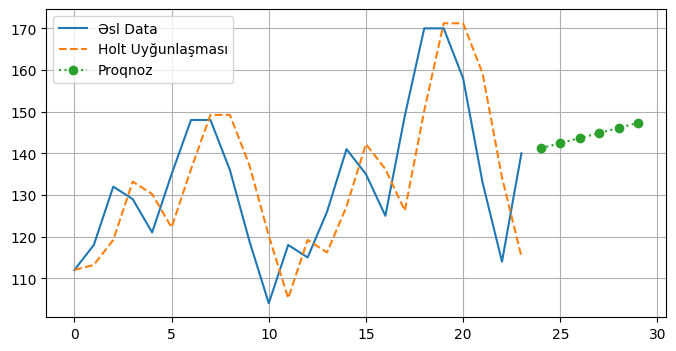

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data n√ºmun…ôsi
data = [112,118,132,129,121,135,148,148,136,119,104,118,
        115,126,141,135,125,149,170,170,158,133,114,140]

df = pd.Series(data)

# Holt Modeli qururuq (Trend VAR, Seasonality YOX)
holt_model = ExponentialSmoothing(df, trend='add', seasonal=None).fit()

# G…ôl…ôc…ôk 6 addƒ±m √º√ß√ºn proqnoz
forecast = holt_model.forecast(steps=6)

# Qrafikl…ô g√∂st…ôr…ôk
plt.figure(figsize=(8,4))
plt.plot(df, label='∆èsl Data')
plt.plot(holt_model.fittedvalues, label='Holt Uyƒüunla≈ümasƒ±', linestyle='--')
plt.plot(forecast, label='Proqnoz', linestyle='dotted', marker='o')
plt.legend()
plt.grid(True)
plt.show()
